In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_searcher import HierarchicalSearcher

In [ ]:
G = nx.powerlaw_cluster_graph(n=100, m=1, p=0.1)
num_reads = 100
version = "Advantage_system6.4"
# region = "na-west-1"
region = "eu-west-1"

### Clique embedding

In [5]:
advantage = AdvantageSampler(
    G, num_reads=num_reads, version=version, region=region, use_clique_embedding=True
)

In [6]:
hierarchical_searcher = HierarchicalSearcher(advantage)

In [7]:
res = hierarchical_searcher.hierarchical_community_search(samples_filename="adv_clique_samples")

{'timing': {'qpu_sampling_time': 16486.0, 'qpu_anneal_time_per_sample': 20.0, 'qpu_readout_time_per_sample': 124.28, 'qpu_access_time': 32411.96, 'qpu_access_overhead_time': 808.04, 'qpu_programming_time': 15925.96, 'qpu_delay_time_per_sample': 20.58, 'post_processing_overhead_time': 14.0, 'total_post_processing_time': 14.0}, 'problem_id': 'a5a0b0ee-a992-4523-9c6b-eddc74a7124a', 'embedding_context': {'embedding': {'x0': (1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 3065), 'x1': (1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 3080), 'x2': (1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 3095), 'x3': (1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 3110), 'x4': (1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 3126), 'x5': (1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 3141), 'x6': (1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 3156), 'x7': (1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 3171), 'x8': (1081, 1082, 1083, 1084, 1085, 1086, 1087, 1

In [11]:
print(f"Modularity: {nx.community.modularity(G, res)}")

Modularity: 0.7478318538924602


In [23]:
clique_samples = np.load("adv_clique_samples.npy", allow_pickle=True)

In [24]:
clique_samples

array([SolverResult(probabilities=rec.array([(0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0.01, -45.49494949),
                  (0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0.01, -43.49494949),
                  (0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0

In [24]:
problem_sizes = np.array([len(sample.probabilities) for sample in clique_samples])
find_clique_emb_times = np.array([
    sample.sampleset_info.time_measurements.find_clique_embedding_time.item()
    for sample in clique_samples
])
sample_function_times = np.array([
    sample.sampleset_info.time_measurements.sample_function_time.item() for sample in clique_samples
])
qpu_access_times = np.array([
    sample.sampleset_info.dwave_sampleset_info.qpu_access_time.item() for sample in clique_samples
])

In [16]:
print("Pr. size\tFind cl. emb. time\tSample fun. time\tQPU acc time")
digits = 4
for pr_size, f_cl_emb_t, sample_fun_t, qpu_acc_t in zip(problem_sizes, find_clique_emb_times, sample_function_times, qpu_access_times):
    f_cl_emb_t = round(f_cl_emb_t, digits)
    sample_fun_t = round(sample_fun_t, digits)
    print(pr_size, "\t\t", f_cl_emb_t, "\t\t", sample_fun_t, "\t\t", qpu_acc_t)
    print()

Pr. size	Find cl. emb. time	Sample fun. time	QPU acc time
100 		 0.1576 		 0.1078 		 32411.96

77 		 0.147 		 0.0422 		 27083.16

63 		 0.0971 		 0.0531 		 24291.16

13 		 0.1368 		 0.0207 		 23244.76

31 		 0.1385 		 0.0249 		 23741.16

10 		 0.1534 		 0.0356 		 23245.16

10 		 0.1456 		 0.022 		 23245.16

40 		 0.3705 		 0.0345 		 24358.36

25 		 0.1885 		 0.0349 		 23740.76

2 		 0.1153 		 0.0227 		 22749.16

26 		 0.1446 		 0.0226 		 23672.76

31 		 0.1279 		 0.0221 		 23741.16

87 		 0.2248 		 0.044 		 26817.96

25 		 0.2003 		 0.0257 		 23741.16

4 		 0.7592 		 0.0271 		 23059.16

12 		 0.4711 		 0.0488 		 23245.16

90 		 0.4255 		 0.0645 		 24878.36

68 		 0.3548 		 0.0429 		 24290.76

11 		 0.2849 		 0.035 		 23244.76

2 		 0.1977 		 0.0281 		 22715.16

7 		 0.1785 		 0.026 		 23059.16

2 		 0.1854 		 0.0295 		 22439.16

2 		 0.1501 		 0.0216 		 22715.16



In [25]:
print(f"Sum of qpu_access_time [microsec]: {qpu_access_times.sum()}")
print(f"Sum of sample function time[sec]: {sample_function_times.sum()}")
print(f"Sum of find_clique_embedding_time [sec]: {find_clique_emb_times.sum()}")

Sum of qpu_access_time [microsec]: 555730.68
Sum of sample function time[sec]: 0.8366104999440722
Sum of find_clique_embedding_time [sec]: 5.355177200050093


Text(0.5, 1.0, 'Qpu access time [microsec.] in function of subproblems sizes')

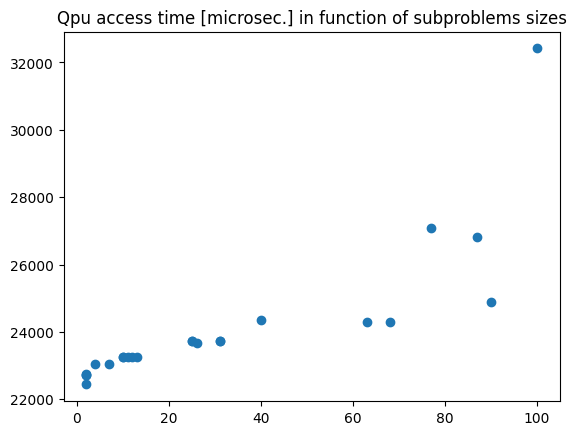

In [17]:
plt.scatter(problem_sizes, qpu_access_times)
plt.title("Qpu access time [microsec.] in function of subproblems sizes")

### Standard embedding

In [4]:
advantage = AdvantageSampler(
    G, num_reads=num_reads, version=version, region=region, use_clique_embedding=False
)

In [5]:
hierarchical_searcher = HierarchicalSearcher(advantage)

In [6]:
res_2 = hierarchical_searcher.hierarchical_community_search(samples_filename="adv_heuristic_samples")

{'timing': {'qpu_sampling_time': 17822.0, 'qpu_anneal_time_per_sample': 20.0, 'qpu_readout_time_per_sample': 137.64, 'qpu_access_time': 33745.96, 'qpu_access_overhead_time': 12677.04, 'qpu_programming_time': 15923.96, 'qpu_delay_time_per_sample': 20.58, 'post_processing_overhead_time': 59.0, 'total_post_processing_time': 59.0}, 'problem_id': '8506063b-7ff3-4d2d-9ef8-77af7b8af5a6', 'embedding_context': {'embedding': {'x1': (321, 322, 323, 324, 325, 320, 319, 318, 3900, 317, 4845, 3901, 3436, 3437, 3438, 542, 469, 3439), 'x0': (4054, 815, 4053, 4055, 1041, 1042, 1043, 4056, 4052, 4051, 1044, 4050), 'x2': (783, 784, 785, 782, 786, 787, 788, 3543, 3542, 3541, 789, 3540), 'x3': (544, 543, 545, 546, 547, 548, 549, 550, 551, 3482, 3481, 4907, 4906, 4905, 3797, 3483, 3484, 768), 'x4': (799, 798, 800, 3633, 3632, 3630, 3631, 3603, 801, 802, 803, 804, 797, 805, 4878, 4877, 3634), 'x5': (4504, 4503, 4502, 4501, 4505, 4506, 4500, 4507, 98, 4508), 'x6': (4519, 1508, 4520, 4521, 4522, 4523, 4518, 45

In [9]:
print(f"Modularity: {nx.community.modularity(G, res_2)}")

Modularity: 0.7649729619426591


In [20]:
heuristic_samples = np.load("adv_heuristic_samples.npy", allow_pickle=True)

In [21]:
problem_sizes = np.array([len(sample.probabilities) for sample in heuristic_samples])
sample_function_times = np.array([
    sample.sampleset_info.time_measurements.sample_function_time.item() for sample in heuristic_samples
])
qpu_access_times = np.array([
    sample.sampleset_info.dwave_sampleset_info.qpu_access_time.item() for sample in heuristic_samples
])

In [ ]:
print(f"Sum of qpu_access_time [microsec]: {qpu_access_times.sum()}")
print(f"Sum of sample function time[sec]: {sample_function_times.sum()}")

Sum of qpu_access_time [microsec]: 660104.2000000001
Sum of sample function time[sec]: 152.62924499996006


Text(0.5, 1.0, 'Qpu access time [microsec.] in function of subproblems sizes')

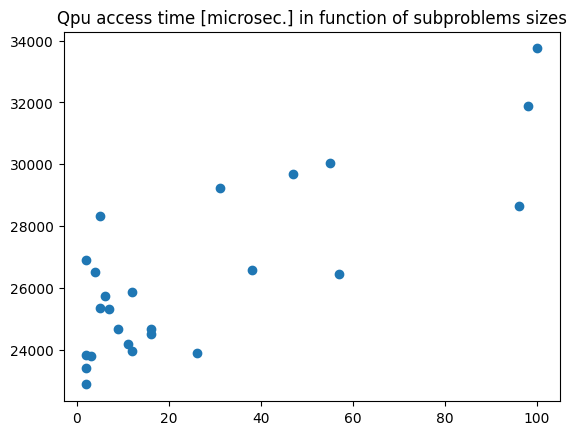

In [13]:
plt.scatter(problem_sizes, qpu_access_times)
plt.title("Qpu access time [microsec.] in function of subproblems sizes")